<a href="https://colab.research.google.com/github/stephanyresque/Ciencia-de-dados-2/blob/main/13_14_11_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ARQUIVO_DADOS = 'churn_clientes.csv'

df = pd.read_csv(ARQUIVO_DADOS)
df = df.drop(columns='id_cliente', axis=1)


colunas_numericas = df.select_dtypes(include='number').columns
colunas_categoricas = df.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


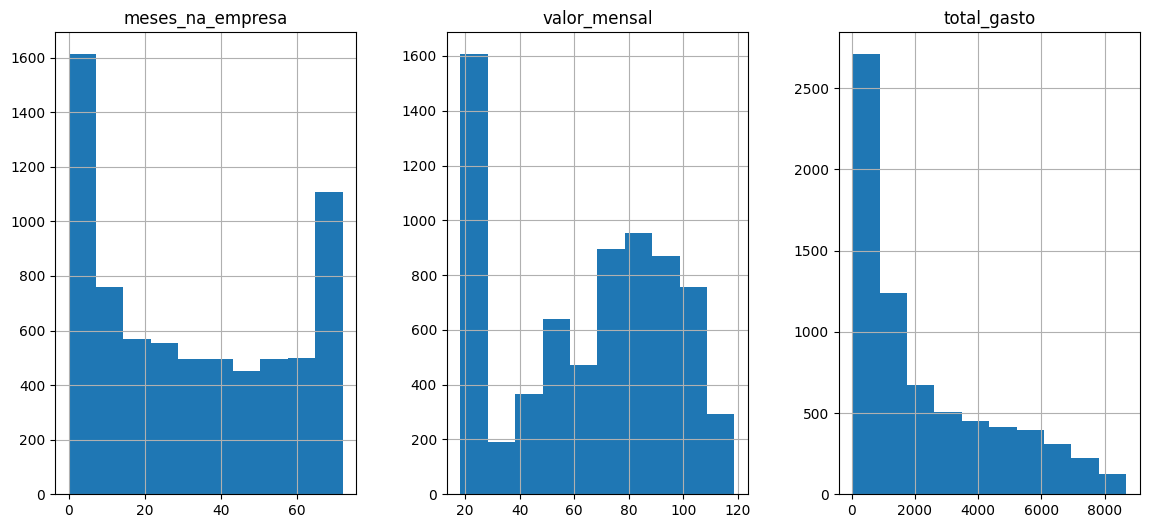

In [2]:
df[colunas_numericas].hist(layout=(1,3), figsize = (14,6));

In [3]:
df['meses_na_empresa'].value_counts(bins = 10).sort_index()

,count
"(-0.073, 7.2]",1612
"(7.2, 14.4]",759
"(14.4, 21.6]",570
"(21.6, 28.8]",556
"(28.8, 36.0]",545
"(36.0, 43.2]",444
"(43.2, 50.4]",452
"(50.4, 57.6]",495
"(57.6, 64.8]",501
"(64.8, 72.0]",1109


In [4]:
df['valor_mensal'].value_counts(bins = 10).sort_index()

,count
"(18.148999999999997, 28.3]",1606
"(28.3, 38.35]",191
"(38.35, 48.4]",365
"(48.4, 58.45]",640
"(58.45, 68.5]",474
"(68.5, 78.55]",893
"(78.55, 88.6]",953
"(88.6, 98.65]",873
"(98.65, 108.7]",754
"(108.7, 118.75]",294


In [5]:
df['total_gasto'].value_counts(bins = 10).sort_index()


,count
"(10.133000000000001, 885.4]",2709
"(885.4, 1752.0]",1239
"(1752.0, 2618.6]",671
"(2618.6, 3485.2]",508
"(3485.2, 4351.8]",454
"(4351.8, 5218.4]",412
"(5218.4, 6085.0]",395
"(6085.0, 6951.6]",310
"(6951.6, 7818.2]",223
"(7818.2, 8684.8]",122


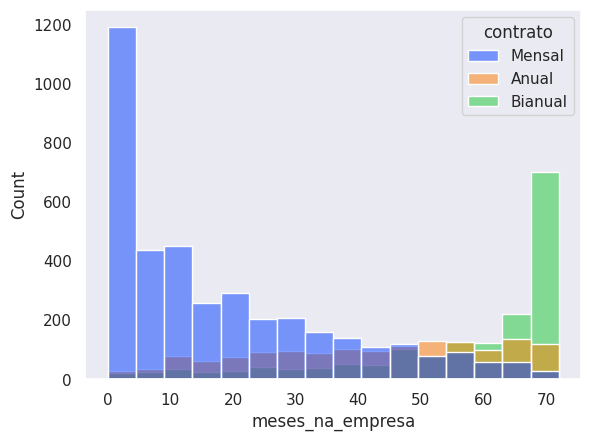

In [6]:
sns.set_theme(style = 'dark', palette='bright', context = 'notebook')

sns.histplot(x = 'meses_na_empresa', data = df, hue = 'contrato');

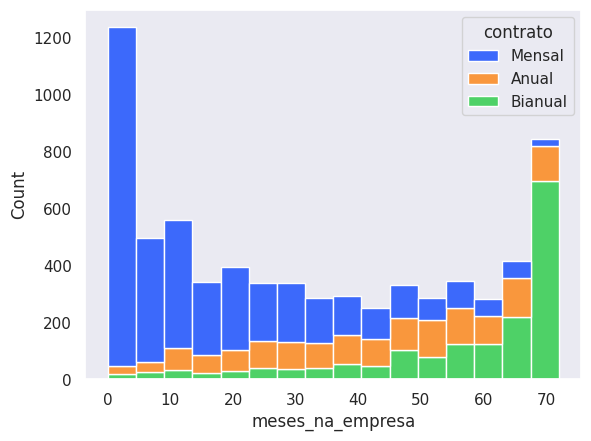

In [7]:
sns.histplot(x = 'meses_na_empresa', data = df, hue = 'contrato', multiple = 'stack');

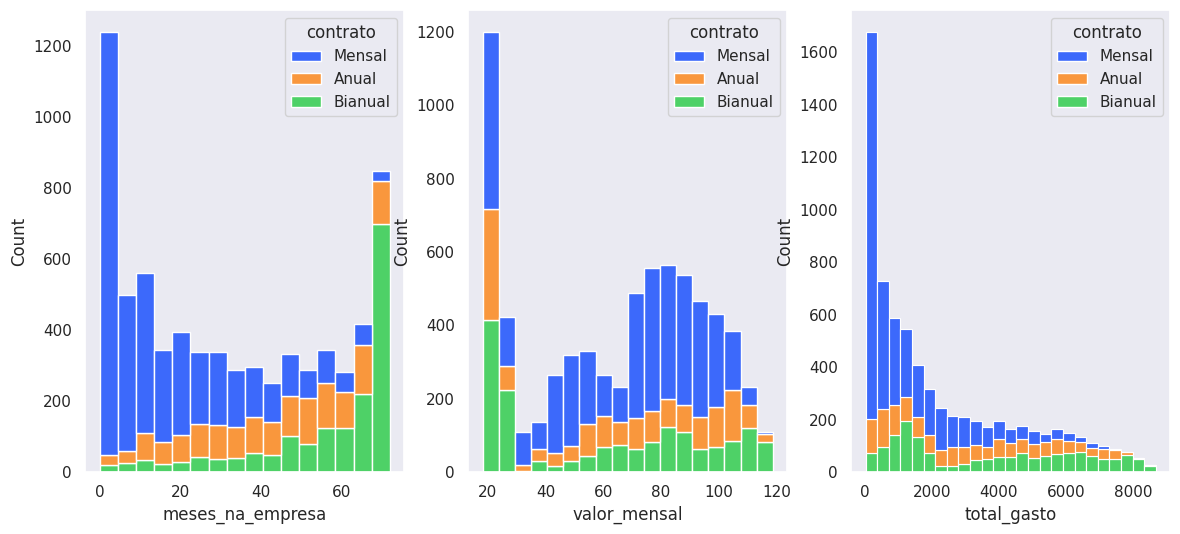

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x = coluna, data = df, ax = axs[i], hue = 'contrato', multiple = 'stack')

plt.show()

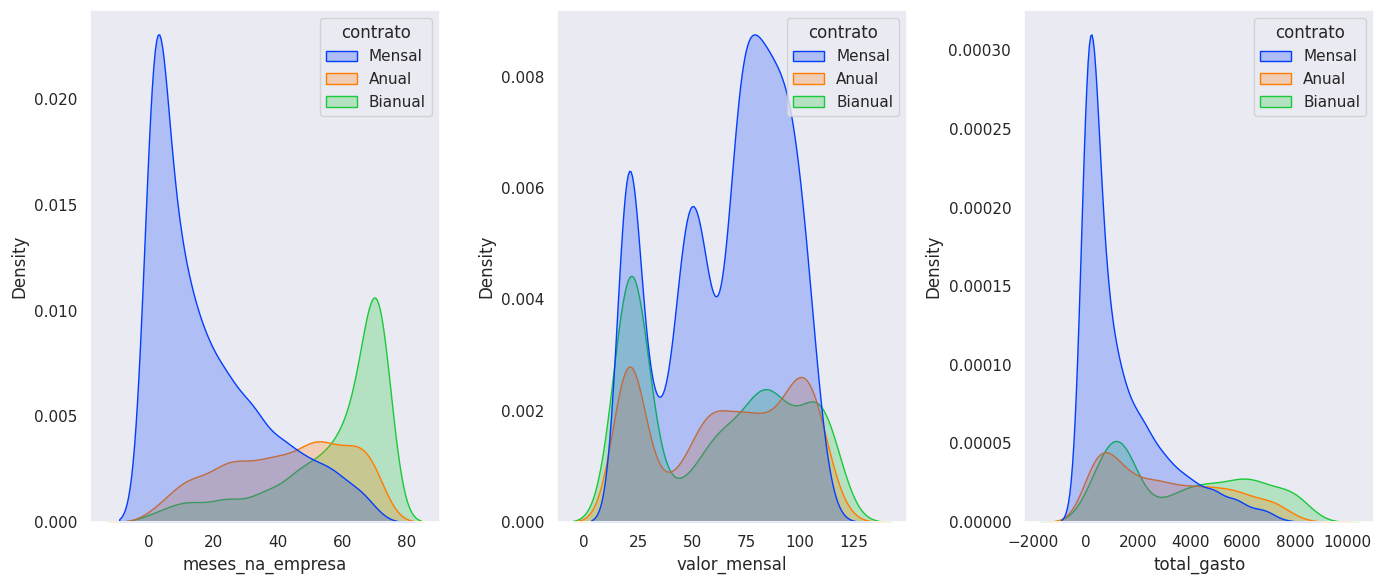

In [11]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6), tight_layout = True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x = coluna, data = df, ax = axs[i], hue = 'contrato', fill = True)

plt.show()

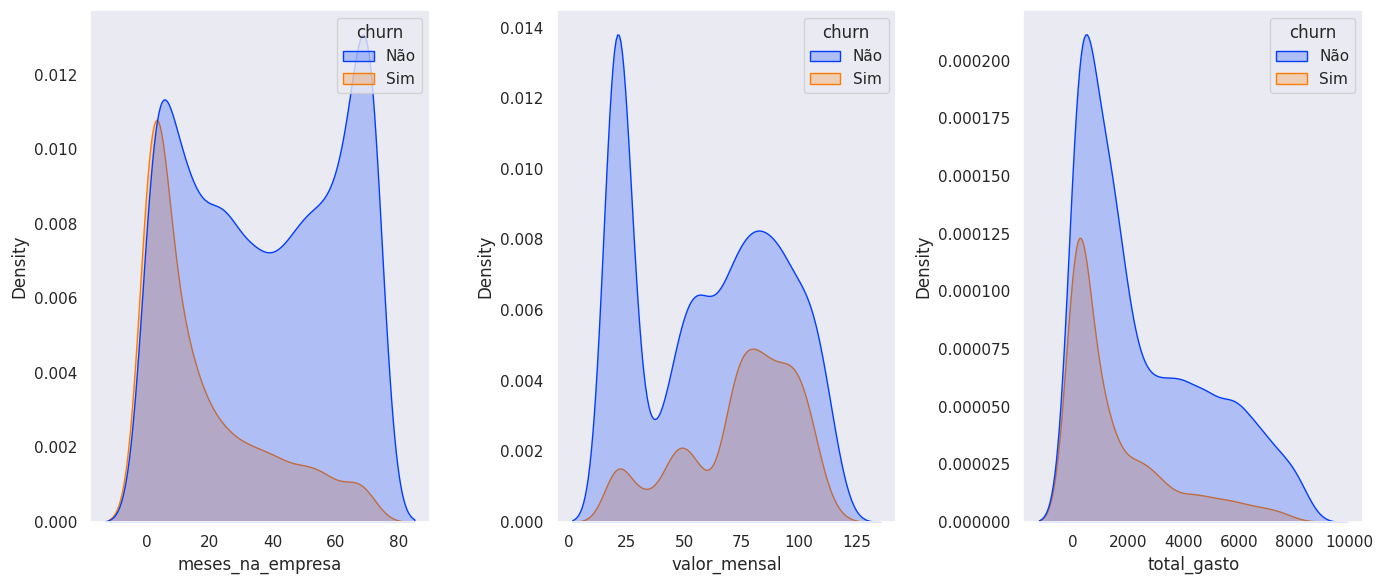

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6), tight_layout = True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x = coluna, data = df, ax = axs[i], hue = 'churn', fill = True)

plt.show()

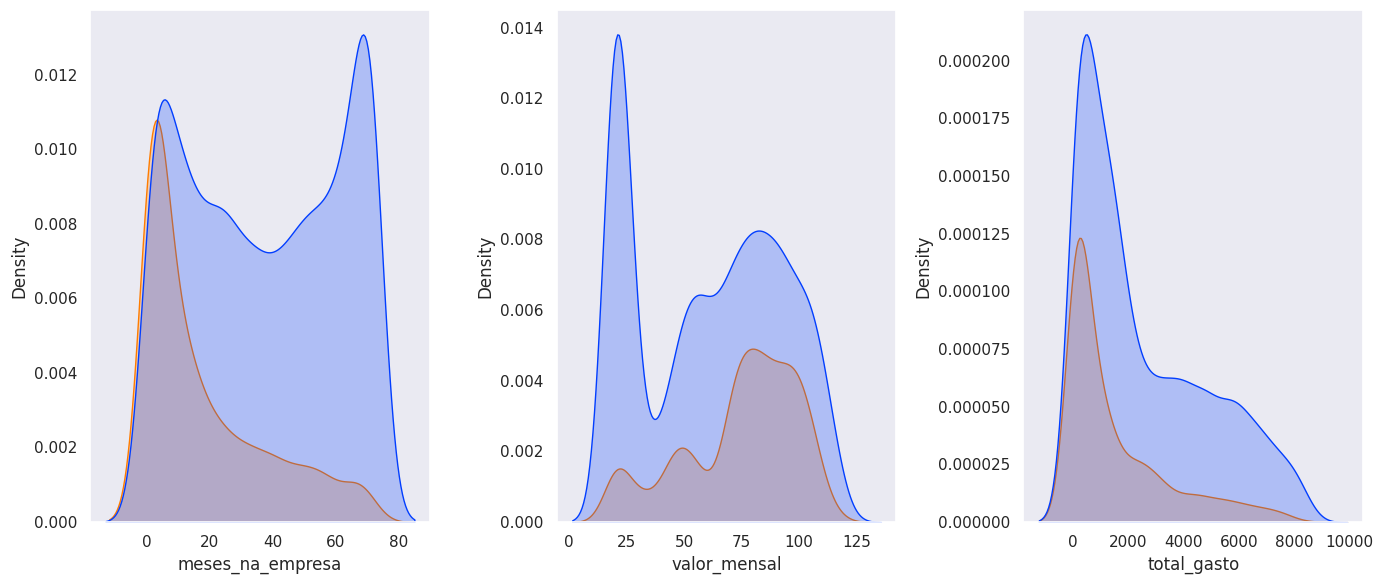

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6), tight_layout = True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x = coluna, data = df, ax = axs[i], hue = 'churn', fill = True)
    legenda = axs[i].get_legend()
    legenda.remove()

plt.show()

In [14]:
legenda

In [27]:
legenda.legend_handles

In [17]:
legenda.get_texts()[1]

Text(0, 0, 'Sim')

In [19]:
[text.get_text() for text in legenda.get_texts()]

['Não', 'Sim']

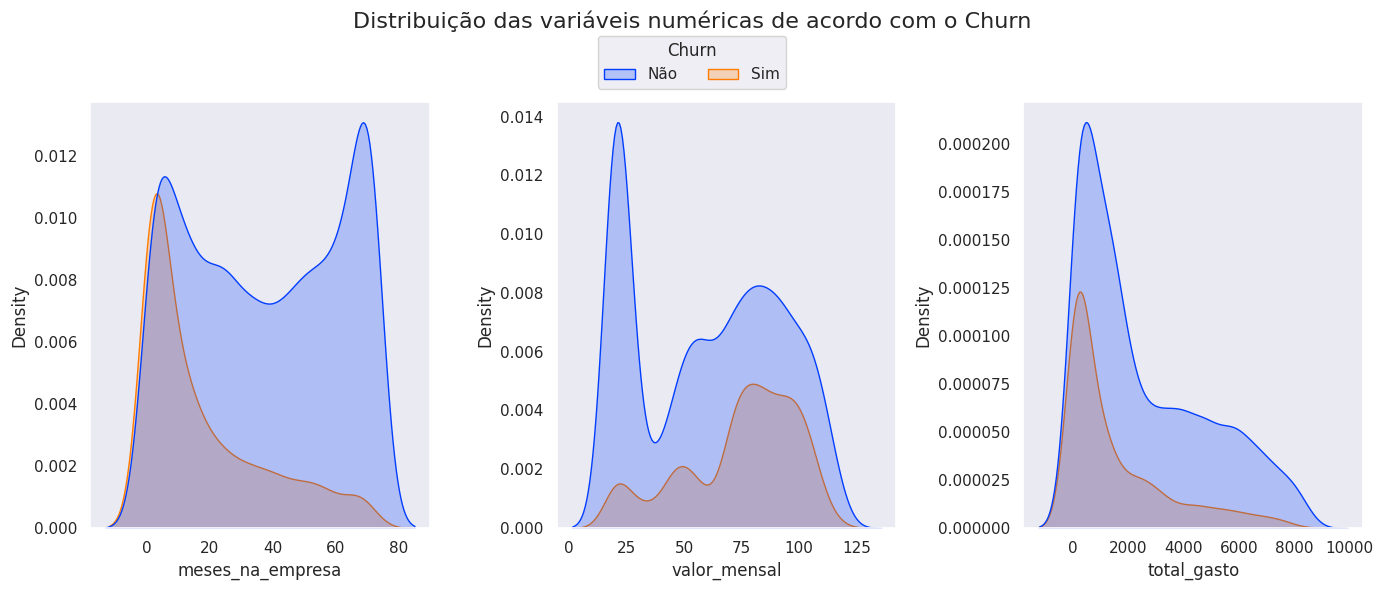

In [26]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6), tight_layout = True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x = coluna, data = df, ax = axs[i], hue = 'churn', fill = True)
    legenda = axs[i].get_legend()
    legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels = rotulos, loc = 'upper center', ncols = 2, title = 'Churn', bbox_to_anchor = (0.5, 0.95))

fig.suptitle('Distribuição das variáveis numéricas de acordo com o Churn\n\n', fontsize = 16)
plt.show()